L


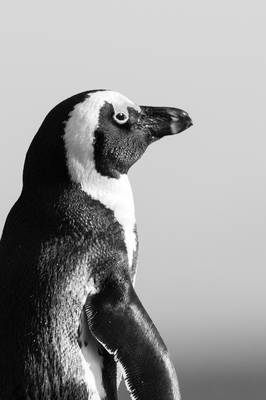

Image size: 266 400


In [41]:
from PIL import Image
import IPython.display as display

image_path = "penguin.jpeg"
image = Image.open(image_path).convert("L")
print(image.mode)

# Set the maximum width or height for the resized image
max_size = 400

# Calculate the new dimensions while maintaining the aspect ratio
width, height = image.size
aspect_ratio = width / height

if width > height:
    new_width = max_size
    new_height = int(max_size / aspect_ratio)
else:
    new_height = max_size
    new_width = int(max_size * aspect_ratio)

resized_image = image.resize((new_width, new_height), Image.LANCZOS)
display.display(resized_image)
print("Image size:", new_width, new_height)

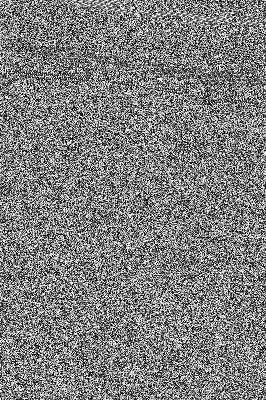

In [44]:
from Cryptodome.Cipher import AES
from Cryptodome.Util.Padding import pad

# Pad the image data to match the block size
block_size = AES.block_size
img_data = resized_image.tobytes()
padded_data = pad(img_data, block_size)

# Initialize AES cipher in ECB mode
key = b'abcdefghijklmnop'
cipher = AES.new(key, AES.MODE_ECB)

# Encrypt the padded data
encrypted_bytes = cipher.encrypt(padded_data)
encrypted_img = Image.frombytes("L", (new_width, new_height), encrypted_bytes)
display.display(encrypted_img)

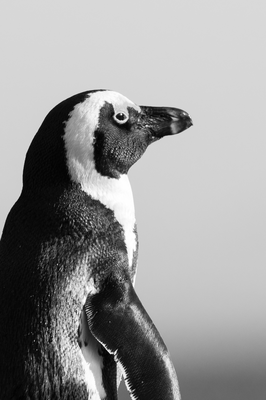

In [45]:
from Cryptodome.Util.Padding import unpad

decrypted_img_bytes = unpad(cipher.decrypt(encrypted_bytes), AES.block_size)
decrypted_image = Image.frombytes("L", (new_width, new_height), decrypted_img_bytes)
display.display(decrypted_image)